In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#inline visualization
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Loading Data 

In [18]:
df = pd.read_csv("Company_Data (1).csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#describe
df.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [25]:
df['Sales_range']=pd.cut(df.Sales, bins=[0,3,5,7,20], labels=['low','medium','regular','high'])

In [27]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,high
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,regular
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,high
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,regular


<AxesSubplot:>

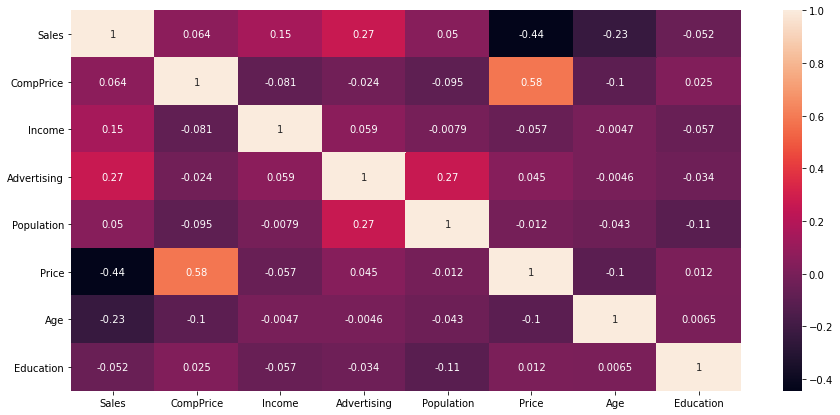

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

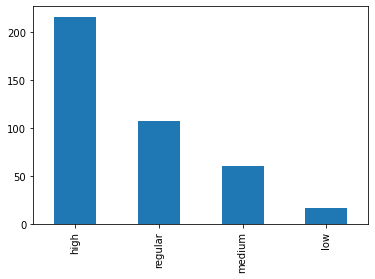

high       216
regular    107
medium      60
low         16
Name: Sales_range, dtype: int64


In [28]:
df['Sales_range'].value_counts(sort=True).plot.bar()
plt.show()
print(df['Sales_range'].value_counts())

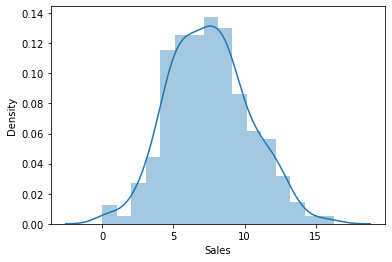

In [10]:
sns.distplot(df.Sales)
plt.show()

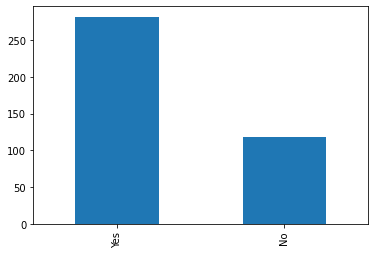

Yes    282
No     118
Name: Urban, dtype: int64


In [30]:
df['Urban'].value_counts(sort=True).plot.bar()
plt.show()
print(df['Urban'].value_counts())

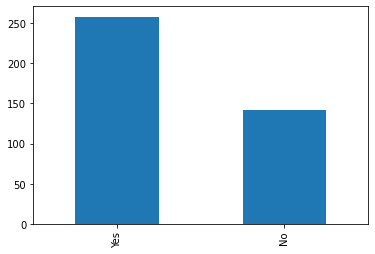

Yes    258
No     142
Name: US, dtype: int64


In [32]:
df['US'].value_counts(sort=True).plot.bar()
plt.show()
print(df['US'].value_counts())

In [11]:
#grouping sales units 


bins = [0,6,12,18]
labels= [0,1,2]
df['Sales_Group'] = pd.cut(df['Sales'],bins=bins, labels=labels,right=False)

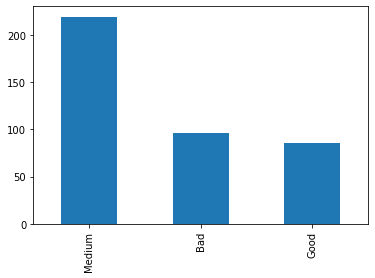

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [33]:
df['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(df['ShelveLoc'].value_counts())

In [35]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

In [12]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=object).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=object)[i]) 
        
    return data.head()

In [36]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_range
0,9.50,138,73,11,276,120,Bad,42,17,1,1,high
1,11.22,111,48,16,260,83,Good,65,10,1,1,high
2,10.06,113,35,10,269,80,Medium,59,12,1,1,high
3,7.40,117,100,4,466,97,Medium,55,14,1,1,high
4,4.15,141,64,3,340,128,Bad,38,13,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1,high
396,6.14,139,23,3,37,120,Medium,55,11,0,1,regular
397,7.41,162,26,12,368,159,Medium,40,18,1,1,high
398,5.94,100,79,7,284,95,Bad,50,12,1,1,regular


In [37]:
df=pd.get_dummies(df, columns=['ShelveLoc'])


In [38]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,high,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,high,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,high,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,high,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,medium,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,high,0,1,0
396,6.14,139,23,3,37,120,55,11,0,1,regular,0,0,1
397,7.41,162,26,12,368,159,40,18,1,1,high,0,0,1
398,5.94,100,79,7,284,95,50,12,1,1,regular,1,0,0


In [39]:
df= df.drop(columns={'Sales'},axis=1)


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CompPrice         400 non-null    int64   
 1   Income            400 non-null    int64   
 2   Advertising       400 non-null    int64   
 3   Population        400 non-null    int64   
 4   Price             400 non-null    int64   
 5   Age               400 non-null    int64   
 6   Education         400 non-null    int64   
 7   Urban             400 non-null    int32   
 8   US                400 non-null    int32   
 9   Sales_range       399 non-null    category
 10  ShelveLoc_Bad     400 non-null    uint8   
 11  ShelveLoc_Good    400 non-null    uint8   
 12  ShelveLoc_Medium  400 non-null    uint8   
dtypes: category(1), int32(2), int64(7), uint8(3)
memory usage: 26.9 KB


In [42]:
df=df.dropna()
df

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,high,1,0,0
1,111,48,16,260,83,65,10,1,1,high,0,1,0
2,113,35,10,269,80,59,12,1,1,high,0,0,1
3,117,100,4,466,97,55,14,1,1,high,0,0,1
4,141,64,3,340,128,38,13,1,0,medium,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,high,0,1,0
396,139,23,3,37,120,55,11,0,1,regular,0,0,1
397,162,26,12,368,159,40,18,1,1,high,0,0,1
398,100,79,7,284,95,50,12,1,1,regular,1,0,0


In [44]:
df.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Urban', 'US', 'Sales_range', 'ShelveLoc_Bad',
       'ShelveLoc_Good', 'ShelveLoc_Medium'],
      dtype='object')

In [45]:
X= df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Urban', 'US', 'ShelveLoc_Bad',
       'ShelveLoc_Good', 'ShelveLoc_Medium']]
Y=df['Sales_range']

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=50,criterion="entropy")

In [47]:
rf.fit(X,Y) 
rf.estimators_  
rf.classes_ 
rf.n_classes_
rf.n_features_ 

rf.n_outputs_ 

rf.oob_score_

0.6215538847117794

In [49]:
df['rf_pred'] = rf.predict(X)
cols = ['rf_pred',' Sales_range']

In [51]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,rf_pred
0,138,73,11,276,120,42,17,1,1,high,1,0,0,high
1,111,48,16,260,83,65,10,1,1,high,0,1,0,high
2,113,35,10,269,80,59,12,1,1,high,0,0,1,high
3,117,100,4,466,97,55,14,1,1,high,0,0,1,high
4,141,64,3,340,128,38,13,1,0,medium,1,0,0,medium


In [52]:
df["Sales_range"]

0         high
1         high
2         high
3         high
4       medium
        ...   
395       high
396    regular
397       high
398    regular
399       high
Name: Sales_range, Length: 399, dtype: category
Categories (4, object): ['low' < 'medium' < 'regular' < 'high']

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df["Sales_range"],df['rf_pred'])

array([[216,   0,   0,   0],
       [  0,  16,   0,   0],
       [  0,   0,  60,   0],
       [  0,   0,   0, 107]], dtype=int64)

In [54]:
pd.crosstab(df["Sales_range"],df["rf_pred"])

rf_pred,high,low,medium,regular
Sales_range,,,,
low,0,16,0,0
medium,0,0,60,0
regular,0,0,0,107
high,216,0,0,0
